# Fit global

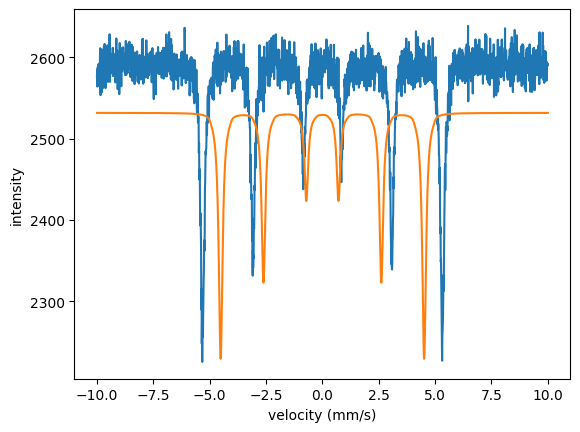

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'..\hello_nexus\example_spectrum.txt')

velocity_experiment = data[:,0]
intensity_experiment = data[:,1]

site = nx.Hyperfine(magnetic_field = nx.Var(value = 28, min = 25, max = 35, fit = True, id = "magnetic field"),
                    isotropic = True)

mat_Fe = nx.Material.Template(nx.lib.material.Fe)

mat_Fe.hyperfine_sites = [site]

layer_Fe = nx.Layer(id = "Fe",
                     material = mat_Fe,
                     thickness = 3000)

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()

beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                     objects = [sample],
                     isotope = nx.lib.moessbauer.Fe57)

spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                  velocity = velocity_experiment,
                                  intensity_data = intensity_experiment,
                                  scaling = "auto")

# calculate the intensity from the assumed model
intensity = spectrum.Calculate()

# plot both the model and the measured data
plt.plot(velocity_experiment, intensity_experiment)
plt.plot(velocity_experiment, intensity)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 3 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             2638.74 |                0 |           263874
    1 |                    ES backgr |             257.138 |                0 |          25713.8
    2 |               magnetic field |                  28 |               25 |               35

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling Pagmo solver with fit method BasinHopping

inner algorithm: Subplex
  population: 40
  iterations: 100

  cost = 2.136686e+01

Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 4, Initial cost: 2.136686e+01, Final cost: 2.136686e+01, Termination: CONVERGENCE

Gradient error analysis.


Fit performed with algorithm:
BasinHopping
Local algorithm:
LevMar
Error analysis:
Gradient

Using 3 fit

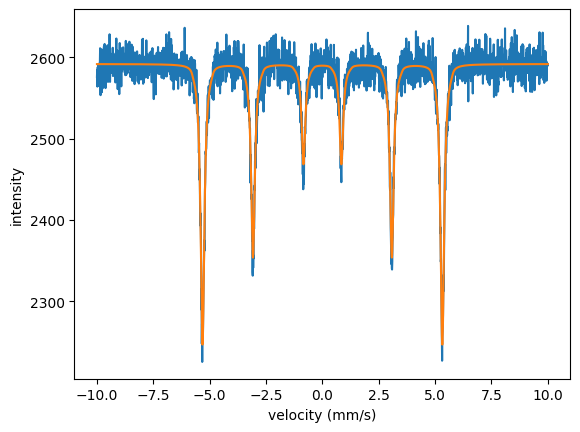

In [2]:
# create a fit object with a list of measurements to be fit in parallel.
fit = nx.Fit(measurements = [spectrum])

# change to the basin hopping algorithm with inner algorithm suplex
fit.options.method = "BasinHopping"
fit.options.BasinHopping.inner = "Subplex"

# run the fit
fit.Evaluate()

plt.plot(velocity_experiment, intensity_experiment)
plt.plot(velocity_experiment, spectrum.result)
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

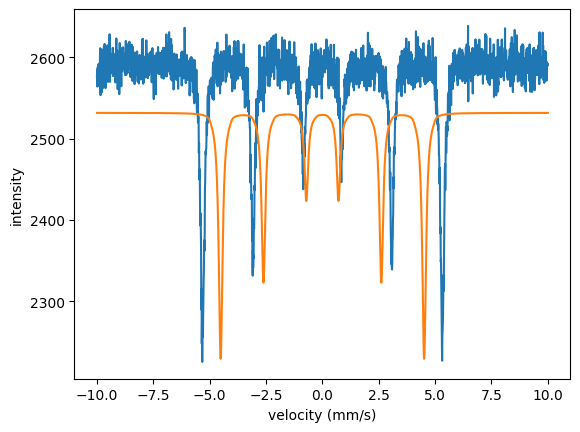

In [3]:
fit.SetInitialVars()

plt.plot(velocity_experiment, intensity_experiment)
plt.plot(velocity_experiment, spectrum())
plt.xlabel('velocity (mm/s)')
plt.ylabel('intensity')
plt.show()

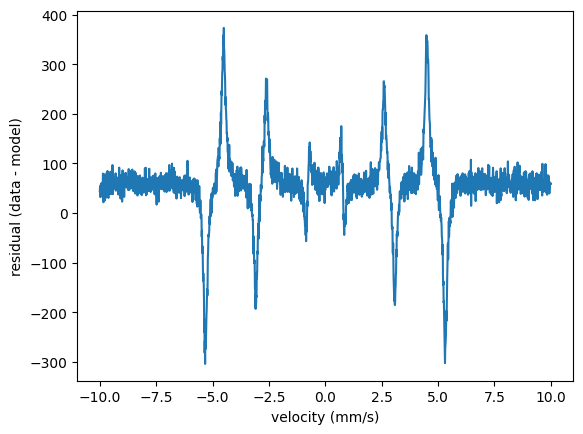

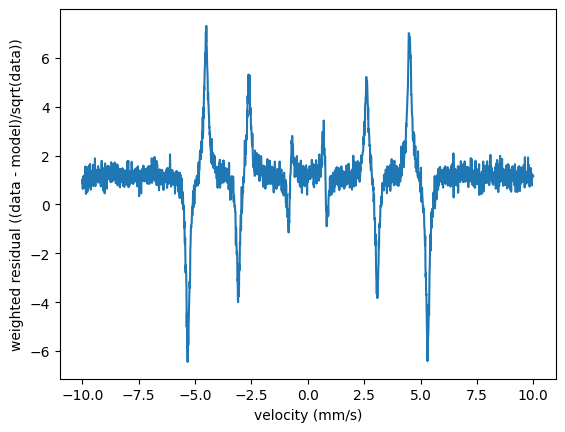

In [4]:
residuals = intensity_experiment - spectrum.result
plt.plot(velocity_experiment, residuals)
plt.xlabel('velocity (mm/s)')
plt.ylabel('residual (data - model)')
plt.show()

residuals = nx.lib.residual.StdDev().ResidualFunction(intensity_experiment, spectrum.result)

plt.plot(velocity_experiment, residuals)
plt.xlabel('velocity (mm/s)')
plt.ylabel('weighted residual ((data - model)/sqrt(data))')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_2676\3792272580.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('residual ($\sqrt{data}$ - $\sqrt{model}$)')


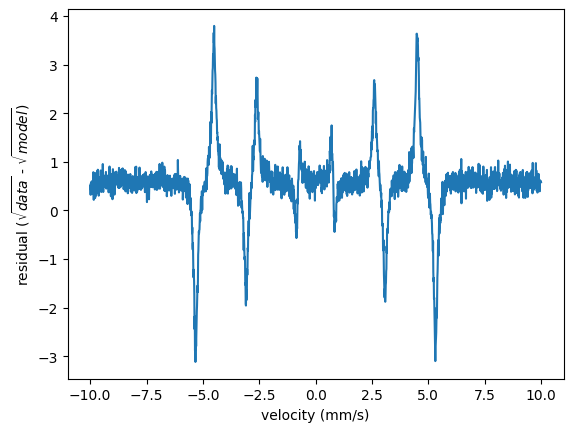

In [5]:
residuals = nx.lib.residual.Sqrt().ResidualFunction(intensity_experiment, spectrum.result)
plt.plot(velocity_experiment, residuals)

plt.xlabel('velocity (mm/s)')
plt.ylabel('residual ($\sqrt{data}$ - $\sqrt{model}$)')
plt.show()

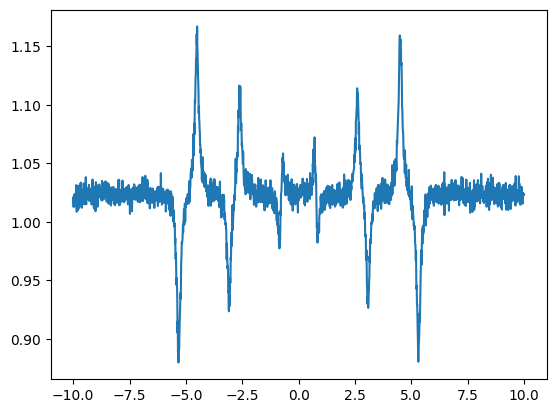

In [6]:
residuals = intensity_experiment/spectrum.result

plt.plot(velocity_experiment, residuals)
plt.show()